   # Start with Python

Python installation

PythonXY
https://code.google.com/p/pythonxy/

WinPython
http://winpython.github.io/

Anaconda
https://store.continuum.io/cshop/anaconda/


Programming in Python
http://pythonic.eu/fjfi/

Web page of Image Processing course
http://www.kky.zcu.cz/cs/courses/zdo

Demo of image processing
http://scipy-lectures.github.io/packages/scikit-image/



# Run notebook

* Create notebook
* Jupyter notebook cells
* Run cell: `Ctrl-Enter` 

In [11]:
%pylab inline

# from pylab import *
# import cStringIO
import urllib
import scipy
import scipy.misc
import skimage
import skimage.data
from skimage.filters import threshold_otsu
from skimage.filters import gaussian as gaussian_filter
# gaussian_filter
# from skimage.filter import threshold_otsu, gaussian_filter
from skimage.morphology import label
from scipy.ndimage.morphology import binary_closing, binary_erosion, binary_opening, binary_dilation

from skimage.measure import regionprops
from skimage.color import label2rgb
from skimage.io import imread
import pandas as pd
# import skimage.filter
# from skimage.filters import 


Populating the interactive namespace from numpy and matplotlib


C:\Users\Jirik\Miniconda3\envs\jupyterhubtest\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Little bit of python

In [12]:
print("hello")

hello


In [13]:
def myFunction(vstup):
    vystup = vstup + 6
    return vystup

myFunction(5)

11

In [14]:
for i in range(2,5):
    print(i)

2
3
4


In [15]:
pole = ['Franta', 'Jakub', 'Marta']

for jmeno in pole:
    print(jmeno)

Franta
Jakub
Marta


# Image Processing in Python

### Read gray image from file or URL

In [16]:
# URL = "http://uc452cam01-kky.fav.zcu.cz/snapshot.jpg"
URL = "https://github.com/mjirik/ZDO/raw/master/objekty/dataset/01.jpg"
URL = "http://plzen.cz/cameraFeed.php"

C:\Users\Jirik\Miniconda3\envs\jupyterhubtest\lib\site-packages\skimage\io\_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


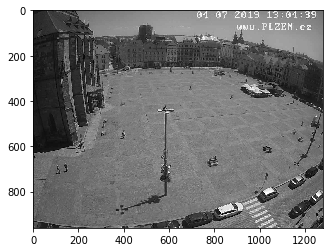

In [17]:
img = imread(URL, as_grey=True)
imshow(img, cmap='gray')

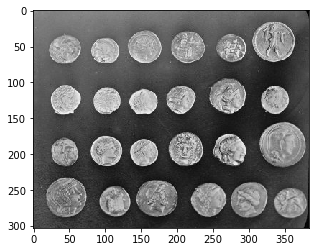

In [18]:
# ukazkova data
img = skimage.data.coins() / 255.0
imshow(img, cmap='gray')


### Manipulation with image data

In [19]:
img.shape

(303, 384)

In [20]:
img[50, 10]

0.43529411764705883

In [21]:
imgi = img.astype(np.int)
imgi

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
img[10:20,15:20]

array([[0.49411765, 0.48627451, 0.49411765, 0.50196078, 0.50588235],
       [0.49411765, 0.4745098 , 0.4745098 , 0.48627451, 0.49411765],
       [0.49019608, 0.49411765, 0.48627451, 0.48627451, 0.49019608],
       [0.48627451, 0.49803922, 0.48627451, 0.48235294, 0.49019608],
       [0.47843137, 0.47843137, 0.47843137, 0.48235294, 0.49019608],
       [0.4745098 , 0.48235294, 0.48627451, 0.49411765, 0.49411765],
       [0.48627451, 0.47843137, 0.48235294, 0.48627451, 0.48627451],
       [0.48627451, 0.4745098 , 0.47843137, 0.48235294, 0.48627451],
       [0.48627451, 0.47843137, 0.47843137, 0.48235294, 0.48235294],
       [0.47843137, 0.47843137, 0.48235294, 0.48235294, 0.48235294]])

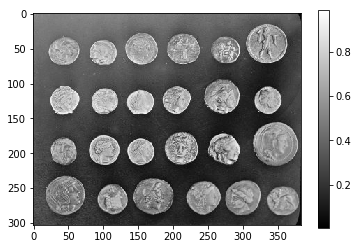

In [23]:
# img[10:200, 10:-100] = 100
imshow(img, cmap='gray')
colorbar()

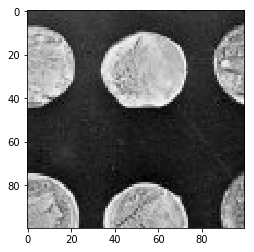

In [24]:
imshow(img[100:200, 100:200], cmap="gray")

# Segmentace

[cviceni7](http://nbviewer.jupyter.org/github/mjirik/ZDO/blob/master/ZDOcvSegmentation.ipynb)

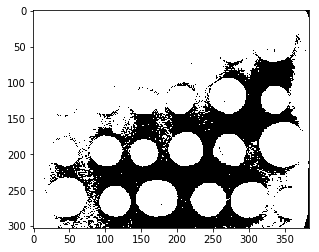

In [25]:
imthr = img > 0.2
imshow(imthr, cmap='gray')

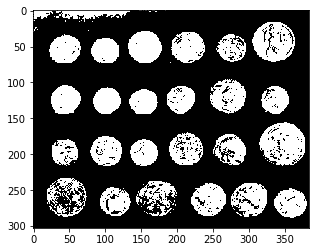

In [26]:
imthr = img > 0.50
imshow(imthr, cmap='gray')

## Image labeling

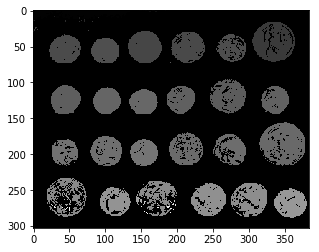

In [27]:
# blobs_labels = skimage.morphology.label(img, background=0)
imlabel = label(imthr, background=0)
imshow(imlabel, cmap='gray')

In [28]:
np.unique(imlabel)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119], dtype=int64)

In [29]:
# pocet labelu
print(np.max(imlabel))

119


### Show one object

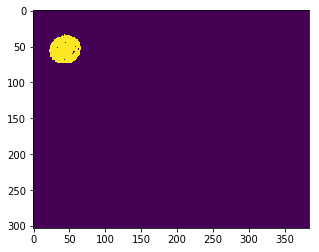

In [30]:
imshow(imlabel==35)

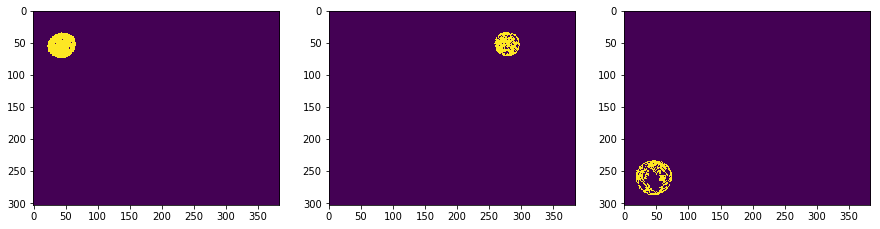

In [31]:
fig, axes = subplots(1,3, figsize=(15,4))
axes[0].imshow(imlabel==35)
axes[1].imshow(imlabel==36)
axes[2].imshow(imlabel==64)

# Filtration

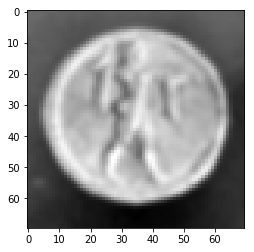

In [32]:
coins_zoom = img[10:80, 300:370]
from scipy import ndimage
gaussian_coins1 = gaussian_filter(coins_zoom, sigma=1)
imshow(gaussian_coins1, cmap='gray')

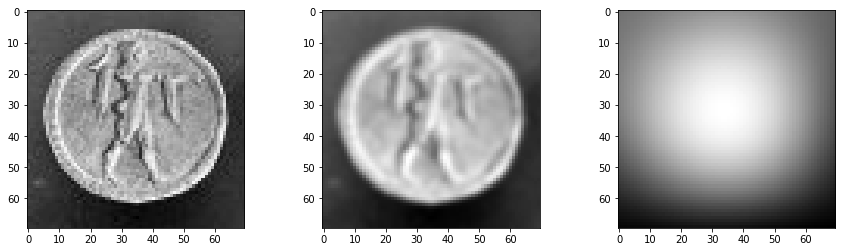

In [33]:
coins_zoom = img[10:80, 300:370]
from scipy import ndimage
gaussian_coins1 = gaussian_filter(coins_zoom, sigma=1)
gaussian_coins2 = gaussian_filter(coins_zoom, sigma=15)

fig, axes = subplots(1,3, figsize=(15,4))
axes[0].imshow(coins_zoom, cmap='gray')
axes[1].imshow(gaussian_coins1, cmap='gray')
axes[2].imshow(gaussian_coins2, cmap='gray')

## Optimální volba volba prahu - Otsu

http://scikit-image.org/docs/dev/auto_examples/plot_otsu.html

In [34]:
thr = threshold_otsu(img)
thr

0.4172564338235294

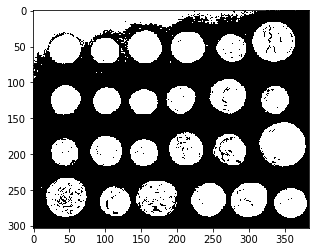

In [35]:
imthr = img > thr
imshow(imthr, cmap='gray')

Spocitame pocet objektu?

# Morfological operations

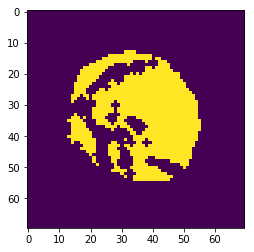

In [36]:

imthr_coin_zoom = imthr[160:230,240:310]
imer = binary_erosion(imthr_coin_zoom, iterations=1)
imshow(imer, interpolation='nearest')

## More examples

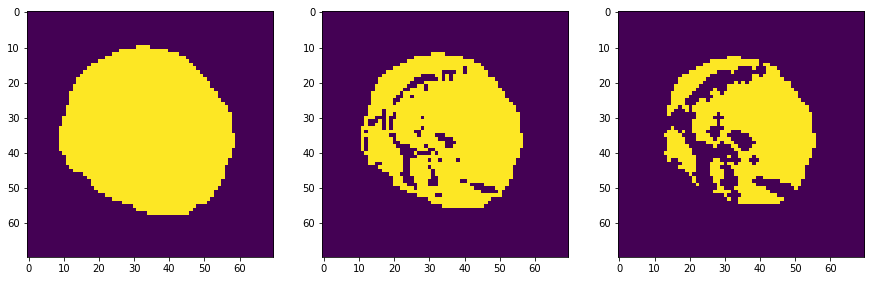

In [37]:

imer = binary_erosion(imthr, iterations=1)
imdil = binary_dilation(imthr, iterations=2)

fig, axes = subplots(1,3, figsize=(15,5))
axes[0].imshow(imdil[160:230,240:310], interpolation='nearest')
axes[1].imshow(imthr[160:230,240:310], interpolation='nearest')
axes[2].imshow(imer[160:230,240:310], interpolation='nearest')

In [38]:
ones([5,5])

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

Pocet prekryvajicich se objektu?

# Object description

[cviceni8](http://nbviewer.ipython.org/github/mjirik/ZDO/blob/master/ZDOcv8.ipynb)

* Size
* Euler number
    $$E = S - N$$
    kde $S$ je conected areas and $N$ number of holes
* Width, Height
* Projection
![projekce0](http://www.kky.zcu.cz/uploads/courses/zdo/lesson7/projekce.jpg)
![projekce1](http://www.kky.zcu.cz/uploads/courses/zdo/lesson7/projekce2.jpg)

* Excentricity - poměr délek nejdelší tětivy a nejdelší tětivy k ní kolmé
* Direction
* Uncompactness 
    $$\textrm{nekompaktnost}=\frac{(\textrm{délka hranice})^2}{\textrm{velikost}}$$


We will use function [regionprops](http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops). 

Centroid  (52.67567567567568, 275.7401247401247)
Area  962
Perimeter  439.3391411371508


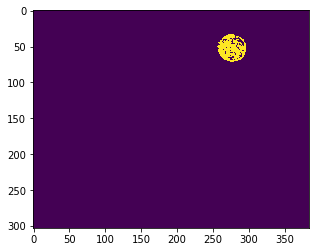

In [39]:
objnumber = 36

imshow(imlabel==objnumber)
# print np.unique(imlabel)


props = regionprops(imlabel+1)
print("Centroid ", props[objnumber].centroid)
print("Area ", props[objnumber].area)
print("Perimeter ", props[objnumber].perimeter)




### Hromadné zpracování

In [40]:
dct = {}
ids = []
centroids = []
areas = []
perimeters = []

for objnumber in range(1, len(props)):
    if props[objnumber].area > 10:
#         print("id ", objnumber)
#         print("Centroid ", props[objnumber].centroid)
#         print("Plocha ", props[objnumber].area)
#         print("Obvod ", props[objnumber].perimeter)
        ids.append(objnumber)
        centroids.append(props[objnumber].centroid)
        areas.append(props[objnumber].area)
        perimeters.append(props[objnumber].perimeter)
df = pd.DataFrame({"Id":ids, "Centroid": centroids, "Area":areas, "Perimeter": perimeters})
df

,Id,Centroid,Area,Perimeter
0,1,"(4.458771929824562, 64.89298245614034)",1140,477.184812
1,7,"(0.8461538461538461, 169.30769230769232)",13,12.621320
2,27,"(43.91171328671329, 334.361013986014)",2288,655.553391
3,33,"(50.911246200607906, 155.18358662613983)",1645,186.308658
4,34,"(51.40576794097921, 215.51643192488262)",1491,375.688384
5,35,"(54.252747252747255, 44.11282051282051)",1365,186.651804
6,36,"(52.67567567567568, 275.7401247401247)",962,439.339141
7,37,"(56.15058611361587, 100.27231740306583)",1109,139.053824
8,43,"(119.63138686131387, 271.4647201946472)",1644,505.386868
9,44,"(124.27782041442825, 44.80199539524175)",1303,156.610173


# Exercise 

Find number of circles, squares, and stars.
Train data can be found [here](https://github.com/mjirik/ZDO/tree/master/objekty/dataset)




![ukazka](https://github.com/mjirik/ZDO/blob/master/objekty/dataset/01.jpg?raw=true)